In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.sparse import csc_matrix, coo_matrix
from scipy.sparse.linalg import lsqr

In [2]:
%matplotlib inline

In [3]:
def construct_X(M, alphas, Np = None):
  D = M*M

  if Np is None:
    Np = int(np.ceil(np.sqrt(2) * M))
    if Np % 2 == 0: Np += 1

  No = len(alphas)
  j = np.mgrid[0:D].astype(np.int32)
  M2 = (M-1) / 2
  grid = np.mgrid[-M2:M-M2,-M2:M-M2].swapaxes(1,2).reshape(2,D)
  i_indices = []
  j_indices = []
  weights = []

  for k, alpha in enumerate(alphas):
    alph_rad = np.radians(alpha)
    proj_vec = np.array([np.cos(alph_rad), -np.sin(alph_rad)])
    proj = np.dot(proj_vec, grid) + Np // 2
    i = np.floor(proj)
    w = (i+1) - proj
    clip = np.logical_and(0 <= i, i < Np-1)
    i_indices.append((i + k*Np)[clip])
    j_indices.append(j[clip])
    weights.append(w[clip])

  w = proj - i
  i_indices.append((i+1 + k*Np)[clip])
  j_indices.append(j[clip])
  weights.append(w[clip])

  i = np.concatenate(i_indices).astype(np.int32)
  j = np.concatenate(j_indices).astype(np.int32)
  w = np.concatenate(weights)
  X = coo_matrix((w, (i,j)), shape = (No*Np, D), dtype = np.float32)

  return X


<div style="color: green; font-weight: bold">Beatiful function, almost exactly like the solution....

Sadly u need to indent the lines: 

  w = proj - i 

  i_indices.append((i+1 + k*Np)[clip])

  j_indices.append(j[clip])
  
  weights.append(w[clip])

  The rest (also the names of the variables) are exactly like the solution.
  </div>

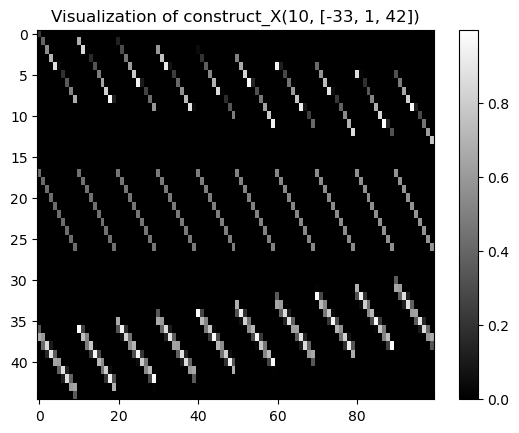

In [4]:
alphas = [-33, 1, 42]
X = construct_X(10, alphas)
X_dense = X.toarray()

plt.imshow(X_dense, cmap='gray', aspect='auto')
plt.colorbar()
plt.title('Visualization of construct_X(10, [-33, 1, 42])')
plt.show()

<div style="color: green; font-weight: bold">Here it is reasonable to plot the X_example data, to compare the results</div>

In [5]:
# Convert to CSC format for efficient computations
X = construct_X(195, alphas,275)
X_77_csc = csc_matrix(X)

print('Sparsity:', round(100 * (1 - X_77_csc.nnz / np.prod(X_77_csc.shape)), 2), '%\n')

Sparsity: 99.52 %



In [6]:
%matplotlib inline

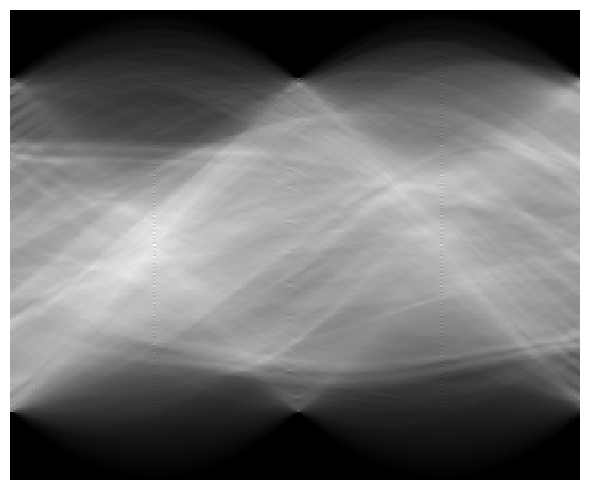

In [8]:
fig = plt.figure(figsize = (6,5))
plt.imshow(np.load('hs_tomography/y_195.npy').reshape(179,275).T, interpolation = 'nearest', aspect =
'auto')
plt.gray(); plt.axis('off'); fig.tight_layout(); plt.show()

<div style="color: green; font-weight: bold">Nice to plot the sinogram, though a title and axes descriptions would be nice.</div>

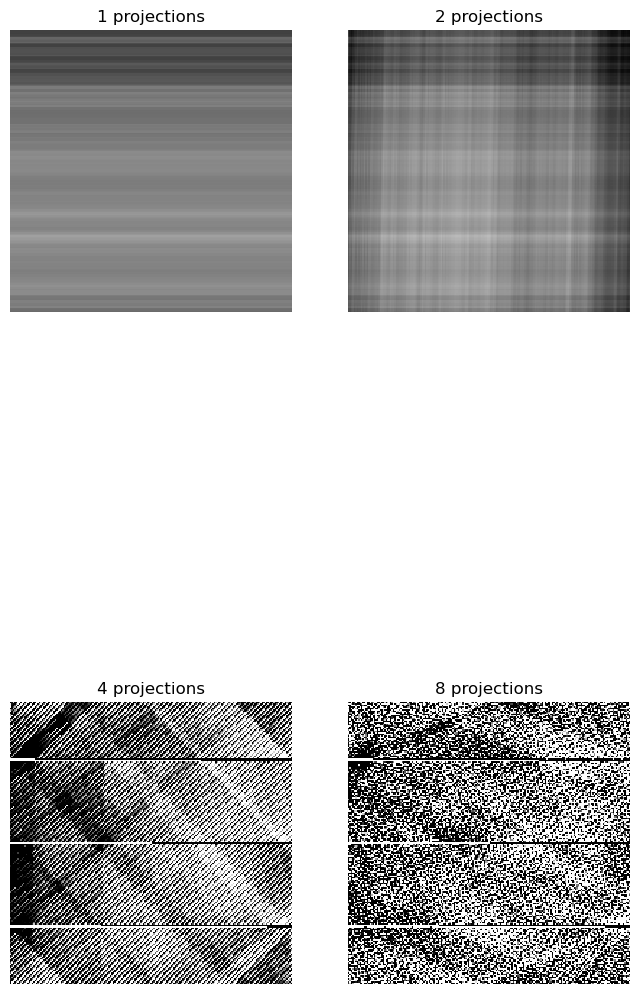

In [9]:
# Load the data
Np = 275
y = np.load('hs_tomography/y_195.npy')
alphas = np.load('hs_tomography/alphas_195.npy')

# Numbers of projection angles to test
n_projections = [1, 2, 4, 8]
fig, axes = plt.subplots(2, 2, figsize=(8, 16))

for n in range(len(n_projections)):
    # Pick specified number of angles
    index = [int(np.floor(len(alphas) * p / n_projections[n])) for p in range(n_projections[n])]
    alphas_sub = alphas[index]

    # Collect corresponding measurements from y
    y_sub = []
    for i in index:
        y_sub.extend(y[i * Np : (i + 1) * Np])

    y_sub = np.array(y_sub)  # Ensure y_sub is a numpy array

    # Construct matrix and reconstruct image
    X = construct_X(195, alphas_sub, Np).tocsc()
    beta = lsqr(X, y_sub, atol=1e-5, btol=1e-5)[0].reshape(195, 195)

    # Plot image
    axes.flat[n].imshow(beta, vmin=0, vmax=255, interpolation='nearest')
    axes.flat[n].set_title('{} projections'.format(n_projections[n]))
    axes.flat[n].axis('off')

plt.show()

<div style="color: green; font-weight: bold">Here the plot does not work quite, as explained, because a few lines in the X_construct belong in the for loop.</div>

<div style="color: green; font-weight: bold">
Overall the whole code needs more comments and structuring.
Comment on which part is task one and so on.
Also make sure the code works, before uploading it, commenting on results and so on.

</div>